# Proyek Analisis Data: Bike-Sharing Dataset
- **Nama:** Rahma Aulia
- **Email:** raaulia98@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

---

1. Pada musim apa pelanggan terbanyak melakukan penyewaan sepeda?
2. Pada hari apakah pelanggan paling banyak menyewa sepeda?





## Import Semua Packages/Library yang Digunakan

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

###Data Collection

In [43]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [44]:
!unzip /content/bike-sharing-dataset.zip

Archive:  /content/bike-sharing-dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Readme.txt              
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: day.csv                 
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hour.csv                


**Insight:** Dapat dilihat bahwa dalam folder data terdapat 3 file dimana 2 termasuk dataset dan yang satunya adalah berkas Readme

###Gathering Data

In [45]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [46]:
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Dataset ini menyimpan info tentang penyewaan sepeda dengan beberapa fitur utama:


*   Waktu: Ada data tanggal, tahun, bulan, jam, dan hari dalam seminggu.
*   Musim & Libur: Info tentang musim, apakah hari itu libur atau hari kerja.
*   Cuaca: Kondisi cuaca, suhu asli & yang dirasakan, kelembapan, plus kecepatan angin.
*   Jenis Pengguna: Jumlah pengguna kasual, pengguna terdaftar, dan total penyewaan sepeda.


###Assesing Data

####Day Dataset

In [47]:
day.shape

(731, 16)

In [48]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [49]:
day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [50]:
print('data yang diduplikat:', day.duplicated().sum())

data yang diduplikat: 0


In [51]:
print(day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

**Insight:** Dataset ini terdiri dari 731 baris dan 16 kolom. Ada sedikit kendala di kolom dteday karena masih berbentuk objek, perlu dikonversi ke format tanggal. Selebihnya aman
* Nggak ada data yang hilang
* Nggak ada data duplikat
* Semua nilai valid, nggak ada yang janggal

####Hour Dataset

In [52]:
hour.shape

(17379, 17)

In [53]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [54]:
hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [55]:
print('data yang diduplikat:', hour.duplicated().sum())

data yang diduplikat: 0


In [56]:
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Insight:**
* Terdiri dari 17.379 baris & 17 kolom
* Terdapat kesalahan tipe data pada kolom dteday (tipe objek)
* Tidak ada nilai yang hilang dalam data
* Tidak ada data duplikat
* Tidak terdapat nilai yang tidak akurat

###Cleaning Data

Menurut saya ada beberapa kolom yang dapat dihapus karena tidak berkaitan dengan pertanyaan analisis yaitu:

1. Kolomm 'Instan' Dapat dihapus karena itu hanyalah kolom ID pelanggan.
2. kolom 'atemp' juga dapat dihapus karena tidak berpengaruh pada analisis karena yang digunakan cukup kolom 'temp' saja.
3. Kolom 'Holiday' atau 'Workingday' dapat dihapus salah satunya karena keduanya memiliki makna yang sejalan

Lalu kita juga bisa mengganti label kolom 'season', 'mnth', 'weekday', dan 'weathersit' agar lebih mudah dipahami

Menghapus kolom 'instan' dari kedua dataset

In [57]:
#Menghapus kolom 'instan' dari kedua dataset
day.drop(['instant'], axis=1, inplace=True)
hour.drop(['instant'], axis=1, inplace=True)

Menghapus kolom 'atemp' dari kedua dataset

In [58]:
#Menghapus kolom 'atemp' dari kedua dataset
day.drop(['atemp'], axis=1, inplace=True)
hour.drop(['atemp'], axis=1, inplace=True)

Menghapus Kolom 'Workingday' dan mempertahankan kolom 'Holiday'

In [59]:
#Menghapus Kolom 'Workingday' dan mempertahankan kolom 'Holiday'
hour.drop(['workingday'], axis=1, inplace=True)
day.drop(['workingday'], axis=1, inplace=True)

Memperbiki tipe data kolom dteday menjadi tipe datetime

In [60]:
#Memperbiki tipe data kolom dteday menjadi tipe datetime
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

Melabeli kolom 'weekday'

In [61]:
#Melabeli kolom 'weekday'
weekday_mapping = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}

day['weekday'] = day['weekday'].map(weekday_mapping)
hour['weekday'] = hour['weekday'].map(weekday_mapping)

Melabeli kolom 'mnth'

In [62]:
#Melabeli kolom 'mnth'
mnth_mapping = {
    1: "Januari",
    2: "Februari",
    3: "Maret",
    4: "April",
    5: "Mei",
    6: "Juni",
    7: "Juli",
    8: "Agustus",
    9: "September",
    10: "Oktober",
    11: "November",
    12: "Desember"
}

day['mnth'] = day['mnth'].map(mnth_mapping)
hour['mnth'] = hour['mnth'].map(mnth_mapping)

Melabeli kolom 'season'

In [63]:
#Melabeli kolom 'season'
season_mapping = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
day['season'] = day['season'].map(season_mapping)
hour['season'] = hour['season'].map(season_mapping)

Melabeli kolom 'weathersit'

In [64]:
#Melabeli kolom 'weathersit'
weather_mapping = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Rain',
    4: 'Heavy Rain'
}
day['weathersit'] = day['weathersit'].map(weather_mapping)
hour['weathersit'] = hour['weathersit'].map(weather_mapping)

In [65]:
#Cek hasil label
print(day['season'].unique())
print(day['mnth'].unique())
print(day['weekday'].unique())
print(day['weathersit'].unique())


['Springer' 'Summer' 'Fall' 'Winter']
['Januari' 'Februari' 'Maret' 'April' 'Mei' 'Juni' 'Juli' 'Agustus'
 'September' 'Oktober' 'November' 'Desember']
['Sabtu' 'Minggu' 'Senin' 'Selasa' 'Rabu' 'Kamis' 'Jumat']
['Cloudy' 'Clear' 'Light Rain']


**Insight:**
* Menghapus kolom yang tidak digunakan seperti kolom 'instant', 'atempt', dan 'workingday'
* Memperbaiki tipe data kolom 'dteday'
* Mengubah tipe data menjadi string untuk melabelinya

###Exploratory Data Analisis

In [66]:
day.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731,731,731.000000,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,Januari,NaN,Sabtu,Clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,NaN,105,463,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,0.500684,NaN,0.028728,NaN,NaN,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,1.000000,NaN,0.000000,NaN,NaN,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,1.000000,NaN,0.000000,NaN,NaN,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,1.000000,NaN,1.000000,NaN,NaN,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [67]:
hour.describe(include='all')

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,Mei,NaN,NaN,Sabtu,Clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,0.502561,NaN,11.546752,0.028770,NaN,NaN,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,0.000000,NaN,6.000000,0.000000,NaN,NaN,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,1.000000,NaN,12.000000,0.000000,NaN,NaN,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,1.000000,NaN,18.000000,0.000000,NaN,NaN,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,1.000000,NaN,NaN,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Melakukan Groupby berdasarkan hari**

In [68]:
#Melakukan Groupby berdasarkan hari
day.groupby(by="weekday").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min","max", "mean", "sum"]
})

dteday  casual registered   cnt                           
        nunique     sum        sum   min   max         mean     sum
weekday                                                            
Jumat       104   78238     409552  1167  8362  4690.288462  487790
Kamis       104   61460     423935   431  7804  4667.259615  485395
Minggu      105  140521     303506   605  8227  4228.828571  444027
Rabu        104   57319     415729   441  8173  4548.538462  473048
Sabtu       105  153852     323955   627  8714  4550.542857  477807
Selasa      104   57843     411266   683  7767  4510.663462  469109
Senin       105   70784     384719    22  7525  4338.123810  455503

**Melakukan groupby data pelanggan berdasarkan hari kerja dan Hari libur**

In [69]:
#Melakukan groupby data pelanggan berdasarkan hari kerja dan Hari libur
day.groupby(by="holiday").agg({
    "dteday": "count",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min", "max", "mean", "sum"]
})

dteday  casual registered   cnt                            
         count     sum        sum   min   max         mean      sum
holiday                                                            
0          710  597658    2616586    22  8714  4527.104225  3214244
1           21   22359      56076  1000  7403  3735.000000    78435

* Penyewa sepeda lebih banyak pada hari kerja, terutama oleh penyewa tetap
* Penyewa casual lebih sering muncul di hari libur
* Rata-rata penyewaan per hari di hari kerja lebih tinggi, tapi hari libur tetap memiliki permintaan yang cukup besar.

**Melakukan groupby berdasarkan musim**

In [70]:
#Melakukan groupby berdasarkan musim
hour.groupby(by=["season","weathersit"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min","max", "mean", "sum"]
})

dteday  casual registered cnt                         
                    nunique     sum        sum min  max        mean     sum
season   weathersit                                                        
Fall     Clear          183  174014     627927   1  977  244.494207  801941
         Cloudy         140   42350     170582   2  868  224.848997  212932
         Light Rain      72    9727      36529   1  891  171.955390   46256
Springer Clear          174   44462     280816   1  801  122.055535  325278
         Cloudy         146   14760     109445   1  712  103.074689  124205
         Heavy Rain       3       8        215  23  164   74.333333     223
         Light Rain      75    1392      20250   1  520   58.650407   21642
Summer   Clear          177  151197     513266   1  873  232.410983  664463
         Cloudy         146   44912     162451   1  957  181.261364  207363
         Light Rain      91    7413      39350   1  782  115.179803   46763
Winter   Clear          166   93072     453419   1  967  209.463779  546491
         Cloudy         135   32459     218993   1  905  201.483974  251452
         Light Rain      62    4251      39419   1  856  116.453333   43670

* Musim Gugur (Fall) & Musim Panas (Summer) memiliki total penyewaan tertinggi.
    * Musim Gugur (Clear): 801.941 penyewaan
    * Musim Panas (Clear): 664.463 penyewaan
* Musim Dingin (Winter) juga cukup tinggi, yaitu saat cuaca cerah: 546.491 penyewaan.
* Musim Semi (Spring) memiliki penyewaan terendah

###Explanatory Data Analisis & Visualization

####Pertanyaan 1: Pada musim apa pelanggan terbanyak melakukan penyewaan sepeda?

In [71]:
#musim pelanggan terbanyak melakukan penyewaan sepeda
sum_season = day.groupby("season")["cnt"].sum().sort_values(ascending=False).reset_index()

print(sum_season)

     season      cnt
0      Fall  1061129
1    Summer   918589
2    Winter   841613
3  Springer   471348


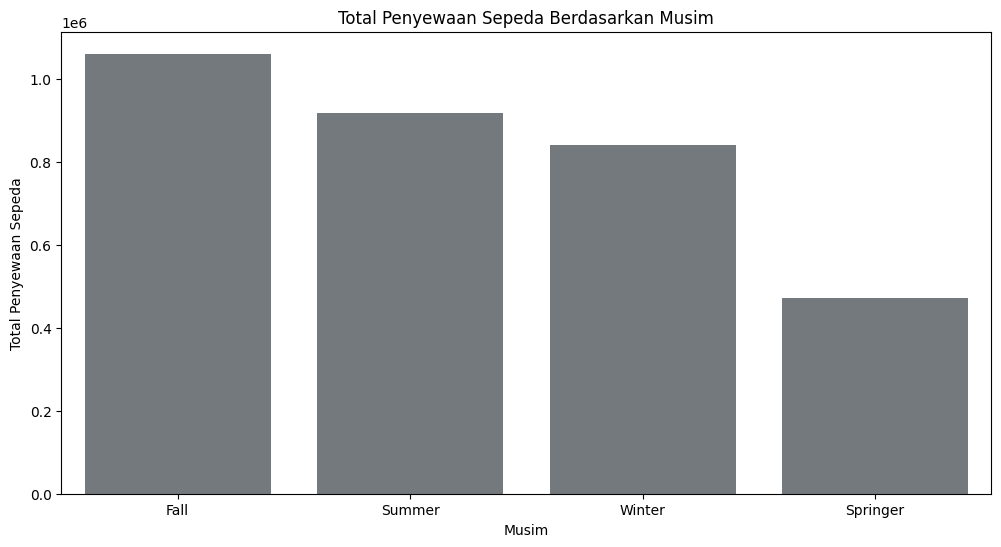

In [72]:
#Visualisasi
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="season", y="cnt", data=sum_season, color="#71797E")
plt.ylabel("Total Penyewaan Sepeda")
plt.xlabel("Musim")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.show()

Dapat dilihat bahwa penyewaan sepeda tertinggi terjadi pada musim Fall, diikuti oleh Summer dan Winter. Sementara itu, jumlah penyewaan terendah terjadi pada musim Spring. Hal ini menunjukkan bahwa kondisi musim dapat memengaruhi keputusan pelanggan dalam menyewa sepeda.

####Pertanyaan 2: Pada hari apakah pelanggan paling banyak menyewa sepeda?

In [73]:
#hari pelanggan paling banyak menyewa sepeda
sum_day = day.groupby("weekday")["cnt"].sum().sort_values(ascending=False).reset_index()

print(sum_day)

  weekday     cnt
0   Jumat  487790
1   Kamis  485395
2   Sabtu  477807
3    Rabu  473048
4  Selasa  469109
5   Senin  455503
6  Minggu  444027


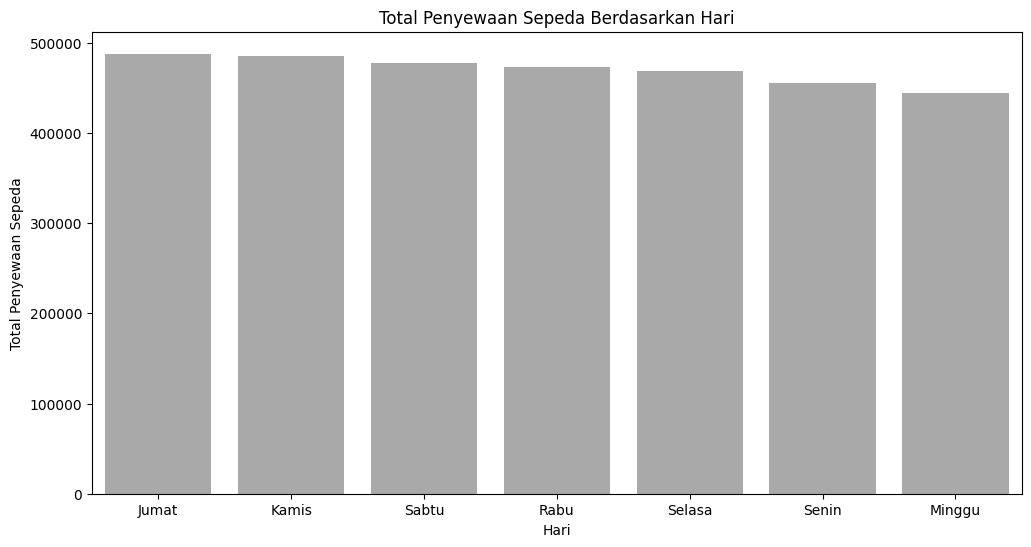

In [74]:
#Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x="weekday", y="cnt", data=sum_day, color="#A9A9A9")
plt.ylabel("Total Penyewaan Sepeda")
plt.xlabel("Hari")
plt.title("Total Penyewaan Sepeda Berdasarkan Hari")
plt.show()

Dari hasil analisis ini, dapat disimpulkan bahwa hari dengan jumlah penyewaan sepeda terbanyak adalah Jumat, diikuti oleh Kamis dan Sabtu. Sementara itu, jumlah penyewaan paling sedikit terjadi pada Minggu.

Hal ini menunjukkan bahwa pengguna cenderung lebih sering menggunakan layanan bike-sharing pada hari kerja, terutama menjelang akhir pekan, dibandingkan dengan hari libur.

###Analisis Lanjutan

####Clustering (mengelompokkan pelanggan berdasarkan pelanggan tetap atau pelanggan kasual berdasarkan  musim)

In [75]:
#Analisis Lanjutan Clustering
seasonal_grouping = day.groupby("season")[["casual", "registered"]].sum().reset_index()

print(seasonal_grouping)


     season  casual  registered
0      Fall  226091      835038
1  Springer   60622      410726
2    Summer  203522      715067
3    Winter  129782      711831


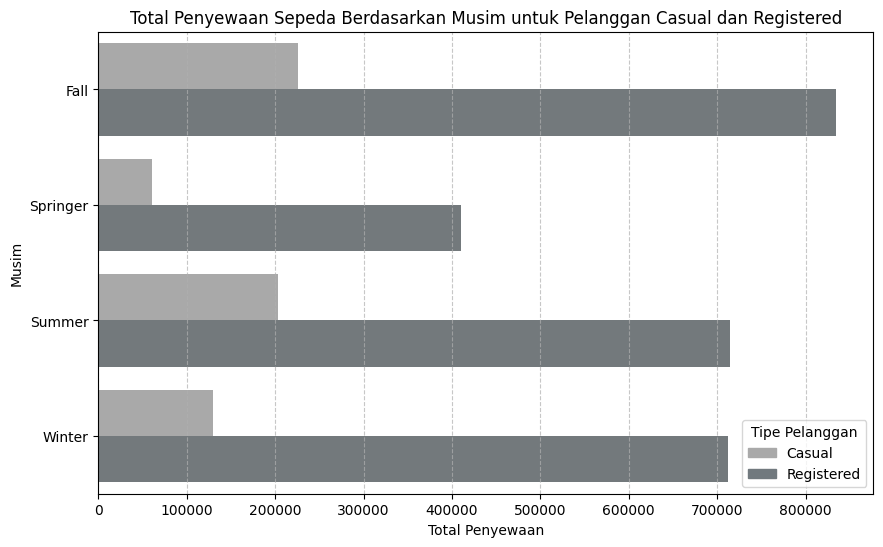

In [76]:
#Visualisasi
colors = {"casual": "#A9A9A9", "registered": "#71797E"}

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=seasonal_grouping.melt(id_vars="season", value_vars=["casual", "registered"]),
    y="season", x="value", hue="variable",
    palette=[colors["casual"], colors["registered"]])
plt.xlabel("Total Penyewaan")
plt.ylabel("Musim")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim untuk Pelanggan Casual dan Registered")
from matplotlib.patches import Patch
legend_labels = [Patch(color=colors["casual"], label="Casual"),
                 Patch(color=colors["registered"], label="Registered")]
plt.legend(handles=legend_labels, title="Tipe Pelanggan")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

Grafik di atas menunjukkan total penyewaan sepeda berdasarkan musim untuk dua tipe pelanggan:
* Casual (pelanggan tidak terdaftar)
* Registered (pelanggan tetap).

**Insight:**
1. Musim gugur (Fall) dan musim panas (Summer) memiliki tingkat penyewaan tertinggi, baik untuk pelanggan casual maupun pelanggan tetap.
2. Pelanggan tetap cenderung lebih stabil dalam penggunaan sepeda
3. Pelanggan tetap mendominasi di setiap musim dengan jumlah penyewaan yang jauh lebih tinggi dibandingkan pelanggan casual.
4. Pelanggan casual lebih dipengaruhi oleh musim
5. Pelanggan casual lebih banyak menyewa sepeda di musim panas (Summer) dibandingkan musim lainnya, kemungkinan besar karena faktor cuaca yang mendukung aktivitas luar ruangan.
6. Jika bisnis ingin meningkatkan penyewaan bagi pelanggan casual, bisa dilakukan dengan promosi atau iklan khusus bagi pelanggan casual agar tetap tertarik menggunakan layanan sepeda di musim apapun.

**Kesimpulan:**

1. Musim dengan penyewaan terbanyak terjadi pada musim Gugur, diikuti oleh musim Panas dan Dingin. Sedangkan penyewaan terendah tercatat pada musim Semi. Hal ini menunjukkan bahwa faktor musim berpengaruh signifikan terhadap minat pelanggan dalam menyewa sepeda.

2. Hari dengan penyewaan terbanyak pada hari Jumat, diikuti oleh Kamis dan Sabtu. Sementara itu, hari Minggu memiliki tingkat penyewaan paling rendah. Pola ini mengindikasikan bahwa layanan bike-sharing lebih diminati pada hari kerja menjelang akhir pekan dibandingkan hari libur.

3. Clustering berdasarkan tipe pelanggan dan musim:
  * Pelanggan tetap (registered) menunjukkan pola penggunaan yang stabil di sepanjang musim, dengan dominasi jumlah penyewaan dibandingkan pelanggan casual.
  * Pelanggan tidak terdaftar (casual) cenderung lebih terpengaruh oleh musim, dengan peningkatan signifikan pada musim Panas, kemungkinan besar disebabkan oleh cuaca yang mendukung aktivitas luar ruangan.
  * Musim Gugur dan Panas merupakan periode dengan penyewaan tertinggi untuk kedua tipe pelanggan.




**Saran:**

1. Strategi Promosi Musiman

  Untuk meningkatkan penyewaan di musim dengan jumlah peminjaman rendah seperti musim Panas dan musim Dingin, perusahaan dapat menerapkan program diskon atau event khusus yang menarik bagi pelanggan, terutama untuk pelanggan casual yang sensitif terhadap kondisi musim.

2. Target Marketing untuk Pelanggan Casual

  Karena pelanggan casual lebih dipengaruhi oleh musim, perusahaan dapat membuat iklan yang fokus pada kenyamanan dan keamanan bersepeda di semua musim. Misalnya, menyediakan perlengkapan tambahan seperti jaket atau panduan rute aman saat musim dingin.

3. Meningkatkan Kepercayaan Pelanggan Registered

  Mengingat pelanggan tetap sudah menunjukkan pola penggunaan yang stabil, perusahaan bisa memberikan reward seperti poin yang dapat ditukar dengan gratis sewa atau merchandise untuk mempertahankan loyalitas mereka.
